In [35]:
import pandas as pd

In [2]:
ab_data = pd.read_csv('ab_data.csv')
print(len(ab_data))
ab_data.head()

294478


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
pd.crosstab(ab_data['landing_page'], ab_data['converted'], margins = True, normalize=True)

converted,0,1,All
landing_page,,,
new_page,0.440580,0.059420,0.5
old_page,0.439761,0.060239,0.5
All,0.880341,0.119659,1.0


In [4]:
from statistics import mean
import numpy as np
np.random.seed(357)
p_0 = mean(ab_data[ab_data['landing_page'] == 'old_page']['converted'])
p_1 = mean(ab_data[ab_data['landing_page'] == 'new_page']['converted'])
sd_0 = p_0 * (1 - p_0) / len(ab_data[ab_data['landing_page'] == 'old_page'])
sd_1 = p_1 * (1 - p_1) / len(ab_data[ab_data['landing_page'] == 'new_page'])

In [5]:
print(p_0, sd_0)
print(p_1, sd_1)

0.12047759085568362 7.196649050679107e-07
0.11884079625642663 7.112087246012613e-07


In [6]:
total = len(ab_data)
p_converted_g_new_page = 17498  / len(ab_data[ab_data['landing_page'] == 'new_page'])
p_converted_g_old_page = 17739 / len(ab_data[ab_data['landing_page'] == 'old_page'])
p_new_page = len(ab_data[ab_data['landing_page'] == 'new_page']) / len(ab_data)
p_old_page = len(ab_data[ab_data['landing_page'] == 'old_page']) / len(ab_data)
p_converted = sum(ab_data['converted']) / len(ab_data)
print("Probability of conversion given new page: ", p_converted_g_new_page)
print("Probability of conversion given old page: ", p_converted_g_old_page)
print("Probability of new page: ", p_new_page)
print("Probability of old page: ", p_old_page)
print("Overall probability of conversion: ", sum(ab_data['converted']) / len(ab_data))

Probability of conversion given new page:  0.11884079625642663
Probability of conversion given old page:  0.12047759085568362
Probability of new page:  0.5
Probability of old page:  0.5
Overall probability of conversion:  0.11965919355605512


In [7]:
pd.crosstab(ab_data['group'], ab_data['converted'], margins = True, normalize=True)

converted,0,1,All
group,,,
control,0.439690,0.060184,0.499874
treatment,0.440651,0.059475,0.500126
All,0.880341,0.119659,1.000000


In [8]:
pd.crosstab(ab_data['group'], ab_data['landing_page'], margins = True, normalize=True)

landing_page,new_page,old_page,All
group,,,
control,0.006547,0.493327,0.499874
treatment,0.493453,0.006673,0.500126
All,0.500000,0.500000,1.000000


In [9]:
control = ab_data[ab_data['group'] == 'control']
treat = ab_data[ab_data['group'] == 'treatment']
treat

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
...,...,...,...,...,...
294462,677163,2017-01-03 19:41:51.902148,treatment,new_page,0
294465,925675,2017-01-07 20:38:26.346410,treatment,new_page,0
294468,643562,2017-01-02 19:20:05.460595,treatment,new_page,0
294472,822004,2017-01-04 03:36:46.071379,treatment,new_page,0


We would like to assume that the new page as a higher conversion rate than the old page, so we supposed H_0: p_new_page > p_old_page vs. H_1: p_new_page <= p_old_page. 

In [10]:
import random
random.seed(357)
def generate(p_new, p_conv_old, p_conv_new, iterations):
    df = []
    timeline = []
    total_new = 0 # number of visits to each landing page
    total_old = 0
    new_conv = 0 # number of conversions on each landing page
    old_conv = 0
    llh_conv_new = 1 # likelihoods of conversion
    llh_conv_old = 1
    for i in range(iterations):
        if random.uniform(0,1) <= p_new: # the new webpage is the landing page
            if random.uniform(0,1) <= p_conv_new: # a conversion happens on the new webpage
                df.append(pd.DataFrame({
                    "landing_page" : ['new'],
                    'converted' : [1]
                }))
                new_conv += 1
                llh_conv_new *= p_conv_new
            else: # a conversion does not happen on the new webpage
                df.append(pd.DataFrame({
                    "landing_page" : ['new'],
                    'converted' : [0]
                }))
                llh_conv_new *= (1 - p_conv_new)
            total_new += 1 # count the landing on the new webpage
        else: # the old webpage is the landing page
            if random.uniform(0,1) <= p_conv_old: # a conversion happens on the old webpage
                df.append(pd.DataFrame({
                    "landing_page" : ['old'],
                    'converted' : [1]
                }))
                old_conv += 1
                llh_conv_old *= p_conv_old
            else: # a conversion does not happen on the old webpage
                df.append(pd.DataFrame({
                    "landing_page" : ['old'],
                    'converted' : [0]
                }))
                llh_conv_old *= (1 - p_conv_old)
            total_old += 1 # count the landing on the old webpage
            
        if total_new == 0: # avoids division by zero
            test_prop_new = 0
        else:
            test_prop_new = new_conv / total_new
            
        if total_old == 0:
            test_prop_old = 0
        else:
            test_prop_old = old_conv / total_old
            
        timeline.append(pd.DataFrame({
            'conversion_rate_new_page' : [test_prop_new],
            'conversion_rate_old_page' : [test_prop_old],
            'iteration' : [i]
        }))
    return pd.concat(df, ignore_index=True), pd.concat(timeline, ignore_index=True), llh_conv_new, llh_conv_old

import scipy.stats
def get_prior(p, alpha, beta):
    return p ** (alpha - 1) * (1 - p) ** (beta - 1) / scipy.stats.beta.pdf()

def get_posterior(data, page_type, p): # given that the prior follows a beta distribution
    y = len(data[(data['landing_page'] == page_type) & (data['converted'] == 1)])
    n = len(data[data['landing_page'] == page_type])
    return (p ** n) * (1 - p) ** (n - y)

llh_conv_new :5.5277994451041446e-11 llh_conv_old :3.8889518014473674e-08
Blue: the rate of conversion on the old landing page; Red: the rate of conversion on the new landing page


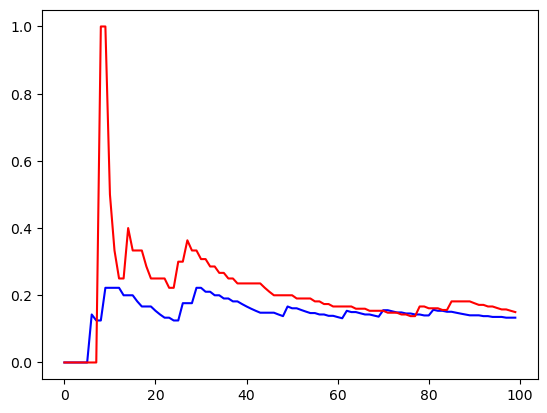

In [11]:
import matplotlib.pyplot as plt
df, timeline, llh_conv_new, llh_conv_old = generate(0.5, p_converted_g_old_page, p_converted_g_new_page, 100)
print("llh_conv_new :" + str(llh_conv_new) + " llh_conv_old :" + str(llh_conv_old))
print('Blue: the rate of conversion on the old landing page; Red: the rate of conversion on the new landing page')
plt.plot(timeline['iteration'], timeline['conversion_rate_new_page'], color='blue')
plt.plot(timeline['iteration'], timeline['conversion_rate_old_page'], color='red')
plt.show()

In [12]:
def sample_proportion(conversion,n,sim_size,alpha=2,beta=20): 
    return np.random.beta(conversion+alpha,n-conversion+beta,sim_size)
def proportion_test_b(conversion1,conversion2,n1,n2,sim_size,alpha1=2,alpha2=2,beta1=20,beta2=20):
    p1 = sample_proportion(conversion1,n1,sim_size,alpha1,beta1)
    p2 = sample_proportion(conversion2,n2,sim_size,alpha2,beta2)
    return (p1 > p2).mean()
def proportion_ratio(conversion1,conversion2,n1,n2,sim_size,alpha1=2,alpha2=2,beta1=20,beta2=20):
    p1 = sample_proportion(conversion1,n1,sim_size,alpha1,beta1)
    p2 = sample_proportion(conversion2,n2,sim_size,alpha2,beta2)
    return p1/p2
def proportion_ci_b(conversion1,conversion2,n1,n2,sim_size,p_value=0.05,alpha1=2,alpha2=2,beta1=20,beta2=20):
    ratios = proportion_ratio(conversion1,conversion2,n1,n2,sim_size,alpha1,alpha2,beta1,beta2)
    return np.quantile(ratios,[p_value/2,1-p_value/2])

In [27]:
new_page = ab_data[ab_data['landing_page'] == 'new_page'].reset_index(drop=True).copy()
old_page = ab_data[ab_data['landing_page'] == 'old_page'].reset_index(drop=True).copy()
new_conversions = sum(new_page['converted'])
new_n = len(new_page)
old_conversions = sum(old_page['converted'])
old_n = len(old_page)
my_sim_size = 100
p_value = proportion_test_b(new_conversions, old_conversions,
                           new_n, old_n, sim_size = my_sim_size)
ratios = proportion_ratio(new_conversions, old_conversions, new_n, old_n, sim_size = my_sim_size)
ci = proportion_ci_b(new_conversions, old_conversions, new_n, old_n, sim_size = my_sim_size)
print(f'Probability that the new page has more conversions than the old page is: {p_value}')
print(f'Average A/B ratios: {ratios.mean()}')
print(f'Credible interval of A/B ratio: {ci}')

Probability that the new page has more conversions than the old page is: 0.09
Average A/B ratios: 0.9875072205140769
Credible interval of A/B ratio: [0.96768845 1.00325423]


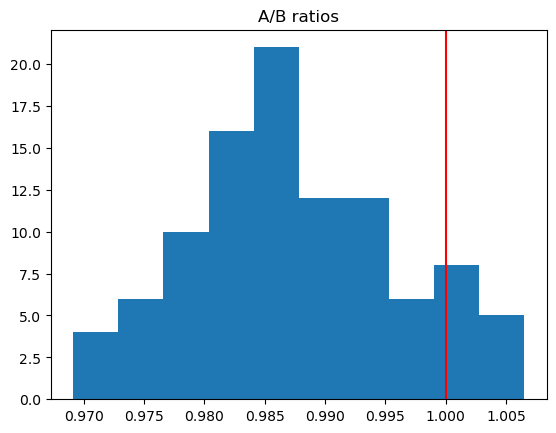

In [29]:
plt.hist(ratios)
plt.axvline(1, color='red')
plt.title("A/B ratios")
plt.show()

Probability that the new page has more conversions than the old page is: 0.1
Average A/B ratios: 0.9866628772772175
Credible interval of A/B ratio: [0.96852799 1.00501531]


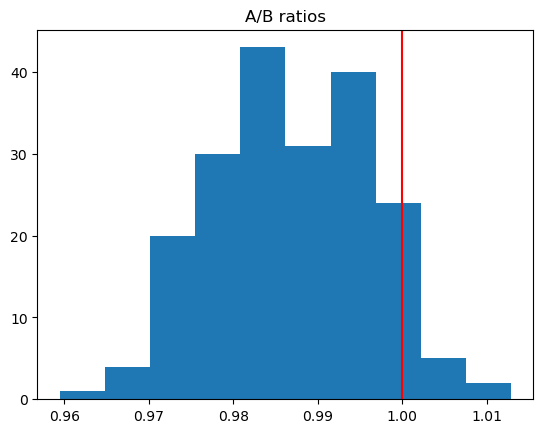

In [32]:
second_sim_size = 200
p_value = proportion_test_b(new_conversions, old_conversions,
                           new_n, old_n, sim_size = second_sim_size)
ratios = proportion_ratio(new_conversions, old_conversions, new_n, old_n, sim_size = second_sim_size)
ci = proportion_ci_b(new_conversions, old_conversions, new_n, old_n, sim_size = second_sim_size)
print(f'Probability that the new page has more conversions than the old page is: {p_value}')
print(f'Average A/B ratios: {ratios.mean()}')
print(f'Credible interval of A/B ratio: {ci}')
plt.hist(ratios)
plt.axvline(1, color='red')
plt.title("A/B ratios")
plt.show()

Probability that the new page has more conversions than the old page is: 0.1
Average A/B ratios: 0.9866628772772175
Credible interval of A/B ratio: [0.96852799 1.00501531]


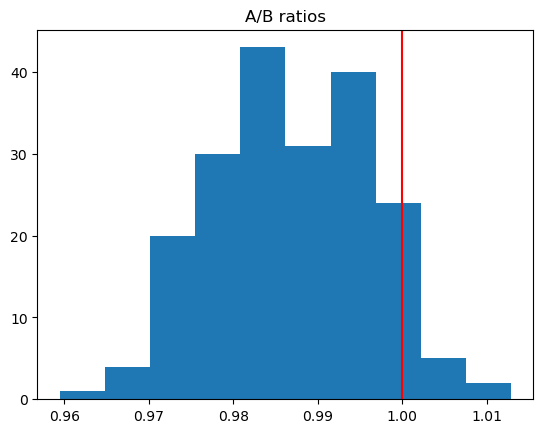

In [32]:
second_sim_size = 200
p_value = proportion_test_b(new_conversions, old_conversions,
                           new_n, old_n, sim_size = second_sim_size)
ratios = proportion_ratio(new_conversions, old_conversions, new_n, old_n, sim_size = second_sim_size)
ci = proportion_ci_b(new_conversions, old_conversions, new_n, old_n, sim_size = second_sim_size)
print(f'Probability that the new page has more conversions than the old page is: {p_value}')
print(f'Average A/B ratios: {ratios.mean()}')
print(f'Credible interval of A/B ratio: {ci}')
plt.hist(ratios)
plt.axvline(1, color='red')
plt.title("A/B ratios")
plt.show()

Probability that the new page has more conversions than the old page is: 0.08384
Average A/B ratios: 0.9864871025682641
Credible interval of A/B ratio: [0.9672432  1.00590165]


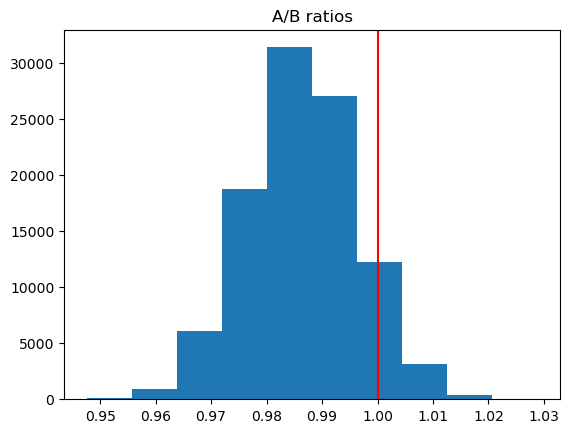

In [39]:
second_sim_size = 100000
p_value = proportion_test_b(
    new_conversions, old_conversions, new_n, old_n, sim_size = second_sim_size, alpha1 = 1, beta1 = 1, alpha2 = 1, beta2 = 1
)
ratios = proportion_ratio(
    new_conversions, old_conversions, new_n, old_n, sim_size = second_sim_size, alpha1 = 1, alpha2 = 1, beta1 = 1, beta2 = 1
)
ci = proportion_ci_b(
    new_conversions, old_conversions, new_n, old_n, sim_size = second_sim_size, alpha1 = 1, alpha2 = 1, beta1 = 1, beta2 = 1
)
print(f'Probability that the new page has more conversions than the old page is: {p_value}')
print(f'Average A/B ratios: {ratios.mean()}')
print(f'Credible interval of A/B ratio: {ci}')
plt.hist(ratios)
plt.axvline(1, color='red')
plt.title("A/B ratios")
plt.show()

Probability that the new page has more conversions than the old page is: 0.085463
Average A/B ratios: 0.9864624429890938
Credible interval of A/B ratio: [0.96730252 1.00591313]


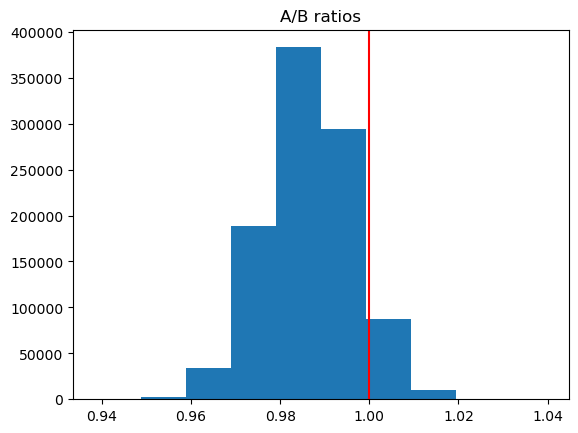

In [44]:
second_sim_size = 1000000
p_value = proportion_test_b(
    new_conversions, old_conversions, new_n, old_n, sim_size = second_sim_size, alpha1 = 1, beta1 = 1, alpha2 = 1, beta2 = 1
)
ratios = proportion_ratio(
    new_conversions, old_conversions, new_n, old_n, sim_size = second_sim_size, alpha1 = 1, alpha2 = 1, beta1 = 1, beta2 = 1
)
ci = proportion_ci_b(
    new_conversions, old_conversions, new_n, old_n, sim_size = second_sim_size, alpha1 = 1, alpha2 = 1, beta1 = 1, beta2 = 1
)
print(f'Probability that the new page has more conversions than the old page is: {p_value}')
print(f'Average A/B ratios: {ratios.mean()}')
print(f'Credible interval of A/B ratio: {ci}')
plt.hist(ratios)
plt.axvline(1, color='red')
plt.title("A/B ratios")
plt.show()

Probability that the new page has more conversions than the old page is: 0.105
Average A/B ratios: 0.9857895456783577
Credible interval of A/B ratio: [0.96940392 1.00476959]


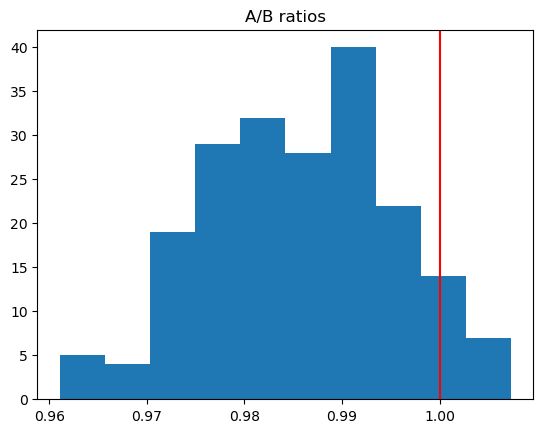

In [34]:
second_sim_size = 200
p_value = proportion_test_b(
    new_conversions, old_conversions, new_n, old_n, sim_size = second_sim_size, alpha1 = 10, beta1 = 1, alpha2 = 10, beta2 = 1
)
ratios = proportion_ratio(
    new_conversions, old_conversions, new_n, old_n, sim_size = second_sim_size, alpha1 = 10, alpha2 = 10, beta1 = 1, beta2 = 1
)
ci = proportion_ci_b(
    new_conversions, old_conversions, new_n, old_n, sim_size = second_sim_size, alpha1 = 10, alpha2 = 10, beta1 = 1, beta2 = 1
)
print(f'Probability that the new page has more conversions than the old page is: {p_value}')
print(f'Average A/B ratios: {ratios.mean()}')
print(f'Credible interval of A/B ratio: {ci}')
plt.hist(ratios)
plt.axvline(1, color='red')
plt.title("A/B ratios")
plt.show()

Probability that the new page has more conversions than the old page is: 0.0848
Average A/B ratios: 0.9866446940652183
Credible interval of A/B ratio: [0.96706553 1.00589478]


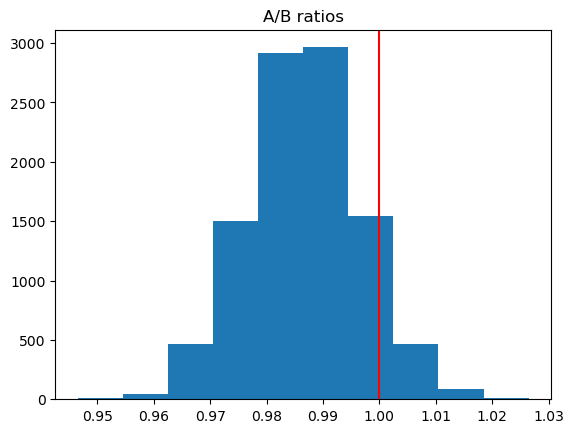

In [37]:
second_sim_size = 10000
p_value = proportion_test_b(
    new_conversions, old_conversions, new_n, old_n, sim_size = second_sim_size, alpha1 = 10, beta1 = 1, alpha2 = 10, beta2 = 1
)
ratios = proportion_ratio(
    new_conversions, old_conversions, new_n, old_n, sim_size = second_sim_size, alpha1 = 10, alpha2 = 10, beta1 = 1, beta2 = 1
)
ci = proportion_ci_b(
    new_conversions, old_conversions, new_n, old_n, sim_size = second_sim_size, alpha1 = 10, alpha2 = 10, beta1 = 1, beta2 = 1
)
print(f'Probability that the new page has more conversions than the old page is: {p_value}')
print(f'Average A/B ratios: {ratios.mean()}')
print(f'Credible interval of A/B ratio: {ci}')
plt.hist(ratios)
plt.axvline(1, color='red')
plt.title("A/B ratios")
plt.show()

Probability that the new page has more conversions than the old page is: 0.09431
Average A/B ratios: 0.9869595103042147
Credible interval of A/B ratio: [0.96777282 1.00641191]


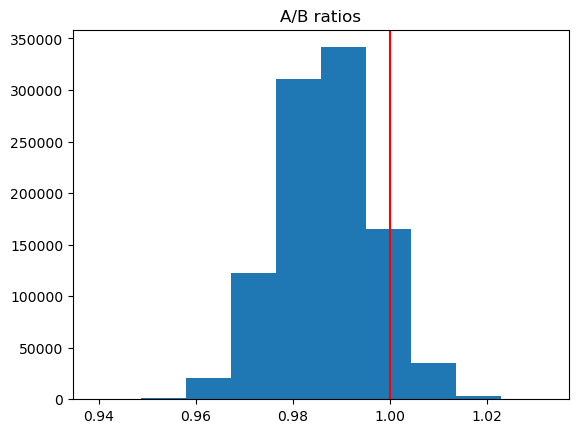

In [43]:
second_sim_size = 1000000
p_value = proportion_test_b(
    new_conversions, old_conversions, new_n, old_n, sim_size = second_sim_size, alpha1 = 10, alpha2 = 1, beta1 = 1, beta2 = 10
)
ratios = proportion_ratio(
    new_conversions, old_conversions, new_n, old_n, sim_size = second_sim_size, alpha1 = 10, alpha2 = 1, beta1 = 1, beta2 = 10
)
ci = proportion_ci_b(
    new_conversions, old_conversions, new_n, old_n, sim_size = second_sim_size, alpha1 = 10, alpha2 = 1, beta1 = 1, beta2 = 10
)
print(f'Probability that the new page has more conversions than the old page is: {p_value}')
print(f'Average A/B ratios: {ratios.mean()}')
print(f'Credible interval of A/B ratio: {ci}')
plt.hist(ratios)
plt.axvline(1, color='red')
plt.title("A/B ratios")
plt.show()

In [33]:
def generate_sample_study(df, size, sample_size):
    new_df = []
    previous_cumu_new = 0
    previous_cumu_old = 0
    previous_cumu_conv_new = 0
    previous_cumu_conv_old = 0
    cumu_conv_ratio_old = 0
    cumu_conv_ratio_new = 0
    for i in range(size):
        current_sample = df.sample(sample_size)
        sample_new = current_sample[current_sample['landing_page'] == 'new_page']
        sample_old = current_sample[current_sample['landing_page'] == 'old_page']
        previous_cumu_new += len(sample_old)
        previous_cumu_old += len(sample_new)
        previous_cumu_conv_old += sum(sample_old['converted'])
        previous_cumu_conv_new += sum(sample_new['converted'])
        if previous_cumu_old != 0: # avoid division by zero
            cumu_conv_ratio_old = previous_cumu_conv_old / previous_cumu_old
        if previous_cumu_new != 0:
            cumu_conv_ratio_new = previous_cumu_conv_new / previous_cumu_new
        new_df.append(pd.DataFrame({
            "time" : i,
            "old_page_interaction" : [len(sample_old)],
            "new_page_interaction" : [len(sample_new)],
            'old_page_conversions' : [sum(sample_old['converted'])],
            'new_page_conversions' : [sum(sample_new['converted'])],
            'cumulative_old_page_interaction' : previous_cumu_old ,
            'cumulative_new_page_interaction' : previous_cumu_new,
            'cumulative_old_page_conversion' : previous_cumu_conv_old,
            'cumulative_new_page_conversion' : previous_cumu_conv_new,
            'cumulative_old_page_conversion_rate' : cumu_conv_ratio_old,
            'cumulative_new_page_conversion_rate' : cumu_conv_ratio_new
        }))
    return pd.concat(new_df, ignore_index=True)

def generate_prob_same_study(timeline):
    prob_same = []
    for _, row in timeline.iterrows():
        prob_same.append(proportion_test_b(
        row['cumulative_old_page_conversion'],
        row['cumulative_new_page_conversion'],
        row['cumulative_old_page_interaction'],
        row['cumulative_new_page_interaction'],
            sim_size = my_sim_size
    ))
    timeline['prob_same'] = prob_same
    return

def generate_random_samples(p, n): # called when generating synthetic data
    results = []
    for i in range(n):
        results.append((random.uniform(0,1) <= p) + 0)
    return results

def generate_synthetic_data(p_old, p_new, length = 50, sample_size = 1):
    new_df = []
    previous_cumu_new = 0
    previous_cumu_old = 0
    previous_cumu_conv_new = 0
    previous_cumu_conv_old = 0
    cumu_conv_ratio_old = 0
    cumu_conv_ratio_new = 0
    for i in range(length):
        old_samples = random.randint(0, sample_size)
        new_samples = sample_size - old_samples
        old_conv = sum(generate_random_samples(p_old, old_samples))
        new_conv = sum(generate_random_samples(p_new, new_samples))
        previous_cumu_new += new_samples
        previous_cumu_old += old_samples
        previous_cumu_conv_new += new_conv
        previous_cumu_conv_old += old_conv
        if previous_cumu_old != 0:
            cumu_conv_ratio_old = previous_cumu_conv_old / previous_cumu_old
        if previous_cumu_new != 0:
            cumu_conv_ratio_new = previous_cumu_conv_new / previous_cumu_new
        new_df.append(pd.DataFrame({
            "time" : i,
            "old_page_interaction" : [old_samples],
            "new_page_interaction" : [new_samples],
            'old_page_conversions' : [old_conv],
            'new_page_conversions' : [new_conv],
            'cumulative_old_page_interaction' : previous_cumu_old ,
            'cumulative_new_page_interaction' : previous_cumu_new,
            'cumulative_old_page_conversion' : previous_cumu_conv_old,
            'cumulative_new_page_conversion' : previous_cumu_conv_new,
            'cumulative_old_page_conversion_rate' : cumu_conv_ratio_old,
            'cumulative_new_page_conversion_rate' : cumu_conv_ratio_new
        }))
    return pd.concat(new_df, ignore_index=True)

In [16]:
num_iterations = 200
sample_size = 100
timeline = generate_sample_study(df = ab_data, size = num_iterations, sample_size = sample_size)

Blue line: estimated conversion rate for the old landing page; Red line: estimated conversion rate for the new landing page.


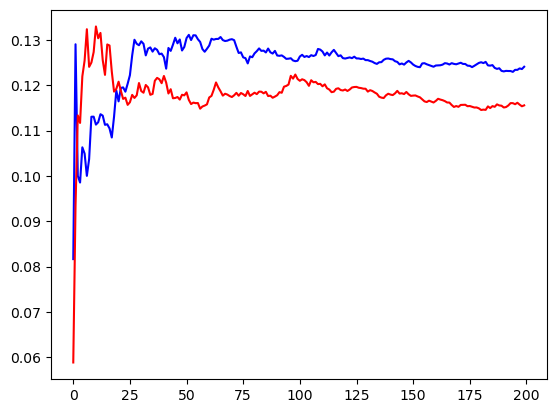

In [17]:
print("Blue line: estimated conversion rate for the old landing page; Red line: estimated conversion rate for the new landing page.")
plt.plot(timeline['time'], timeline['cumulative_old_page_conversion_rate'], color='blue')
plt.plot(timeline['time'], timeline['cumulative_new_page_conversion_rate'], color='red')
plt.show()

In [18]:
synthetic1 = generate_synthetic_data(p_old = 0.10, p_new = 0.11, length = num_iterations, sample_size = sample_size)
synthetic2 = generate_synthetic_data(p_old = 0.11, p_new = 0.10, length = num_iterations, sample_size = sample_size)
synthetic3 = generate_synthetic_data(p_old = 0.10, p_new = 0.10, length = num_iterations, sample_size = sample_size)

GREEN IS THE ACTUAL DATA
BLUE IS NEW BETTER THAN OLD
RED IS OLD BETTER THAN NEW
BLACK IS BOTH ARE EQUAL


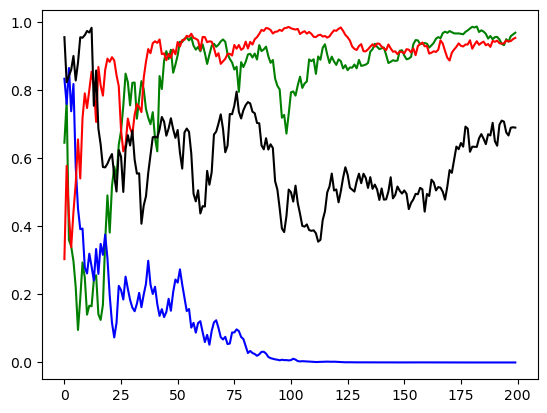

In [19]:
generate_prob_same_study(timeline)
generate_prob_same_study(synthetic1)
generate_prob_same_study(synthetic2)
generate_prob_same_study(synthetic3)

print("""GREEN IS THE ACTUAL DATA
BLUE IS NEW BETTER THAN OLD
RED IS OLD BETTER THAN NEW
BLACK IS BOTH ARE EQUAL""")
plt.plot(timeline['time'], timeline['prob_same'], color="green")
plt.plot(synthetic1['time'], synthetic1['prob_same'], color='blue')
plt.plot(synthetic2['time'], synthetic2['prob_same'], color='red')
plt.plot(synthetic3['time'], synthetic3['prob_same'], color='black')
plt.show()

In conclusion, for this test, we can suppose that the old page is better than the new page.

In [20]:
# creates a dataframe containing the posterior distribution for the conversion rate of the old and new landing pages
# calling with different values of alpha and beta will test the influence of the assumptions/changes in the prior distribution
def posterior_distribution(timeline, alpha = 2.0, beta = 20.0):
    df = {'posterior_new_page' : [], 'posterior_old_page' : []}
    df['posterior_new_page'] += [[alpha, beta]]
    df['posterior_old_page'] += [[alpha, beta]]
    old_page_interaction = 0
    new_page_interaction = 0
    old_page_conversion = 0
    new_page_conversion = 0
    for _, row in timeline.iterrows():
        old_page_interaction += row['old_page_interaction']
        new_page_interaction += row['new_page_interaction']
        old_page_conversion += row['old_page_conversions']
        new_page_conversion += row['new_page_conversions']
        df['posterior_new_page'] += [[alpha + new_page_conversion, beta + new_page_interaction - new_page_conversion]]
        df['posterior_old_page'] += [[alpha + old_page_conversion, beta + old_page_interaction - old_page_conversion]]
    return pd.DataFrame(df)

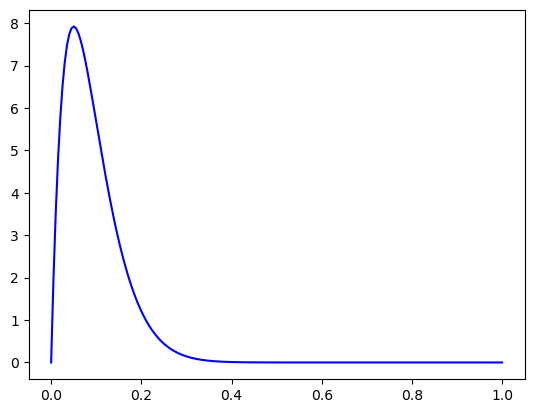

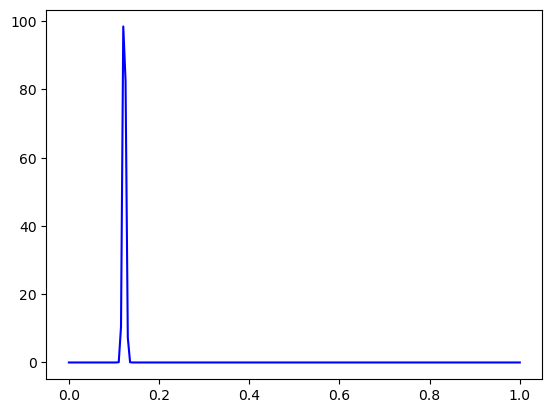

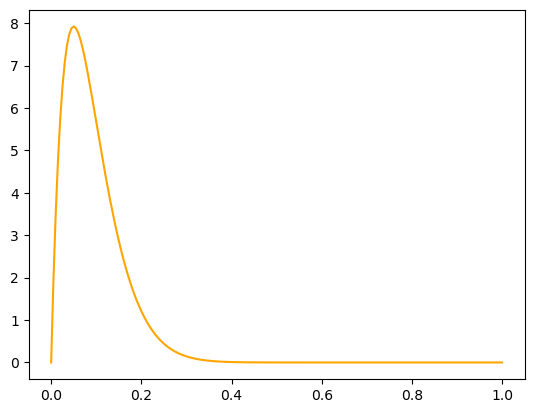

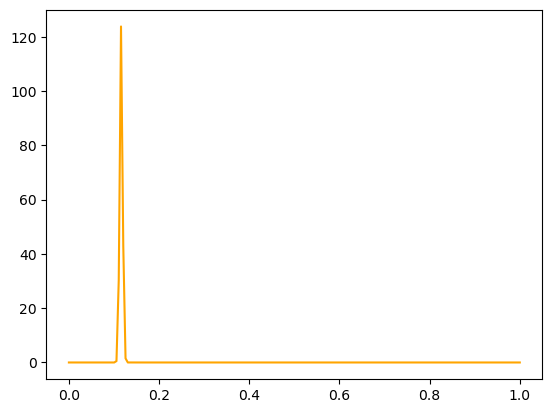

In [21]:
posteriors = posterior_distribution(timeline)
posteriors2 = posterior_distribution(timeline, alpha = 1.0, beta = 1.0)
posteriors3 = posterior_distribution(timeline, alpha = 20.0, beta = 2.0)
npost = posteriors['posterior_new_page']
opost = posteriors['posterior_old_page']
x = np.linspace(0, 1, 200)
newpage_post_changed, newpage_post_changed_indices = np.unique(npost, return_index = True)
oldpage_post_changed, oldpage_post_changed_indices = np.unique(opost, return_index = True)
anew = np.zeros(num_iterations)
bnew = np.zeros(num_iterations)
aold = np.zeros(num_iterations)
bold = np.zeros(num_iterations)
for index in range(num_iterations):
    anew[index] = npost[index][0]
    bnew[index] = npost[index][1]
    aold[index] = opost[index][0]
    bold[index] = opost[index][1]
plt.plot(x, scipy.stats.beta.pdf(x, aold[0], bold[0]), color = 'blue')
plt.show()
plt.plot(x, scipy.stats.beta.pdf(x, aold[-1], bold[-1]), color = 'blue')
plt.show()
plt.plot(x, scipy.stats.beta.pdf(x, anew[0], bnew[0]), color = 'orange')
plt.show()
plt.plot(x, scipy.stats.beta.pdf(x, anew[-1], bnew[-1]), color = 'orange')
plt.show()